text 97 105.0
text TextSpec(content='this', size=200, rotation=0, position=Coordinate(x=105, y=97)) (97.0, 47.0, 506.875, 270.0)
text 31 319.0
text TextSpec(content='more', size=119.0, rotation=0, position=Coordinate(x=0, y=31)) (31.0, 284.0, 428.0, 161.0)
text 182 2.0
text TextSpec(content='stuff', size=77.0, rotation=0, position=Coordinate(x=375, y=182)) (182.0, -20.0, 241.0, 103.0)
text 289 414.0
text TextSpec(content='yeehaw', size=49.0, rotation=0, position=Coordinate(x=0, y=289)) (289.0, 400.0, 264.25, 66.0)
text 425 1.0
text TextSpec(content='uwu', size=74.0, rotation=0, position=Coordinate(x=378, y=425)) (425.0, -21.0, 214.5, 101.0)
text 446 263.0
text TextSpec(content='test', size=72.0, rotation=0, position=Coordinate(x=120, y=446)) (446.0, 242.0, 191.75, 97.0)


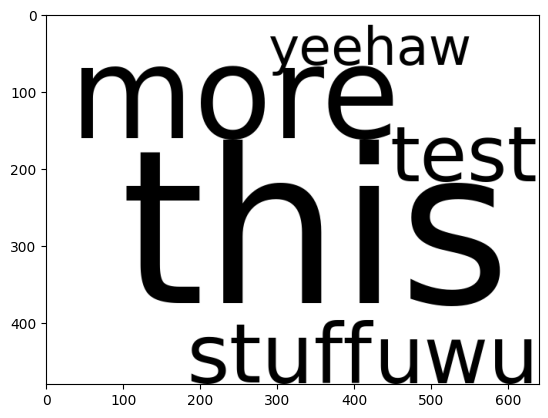

In [1]:
import matplotlib.pyplot as plt

from tagcloud import (
    TagCloud,
    DescendingFrequencyTable,
    FrequencyData
)
from tagcloud.backends.backend_mpl import CanvasMPL

wc = TagCloud(canvas_backend=CanvasMPL)

c = wc.draw(
    frequency_table=DescendingFrequencyTable([
        FrequencyData('test', 1),
        FrequencyData('this', 10),
        FrequencyData('more', 5),
        FrequencyData('stuff', 5),
        FrequencyData('yeehaw', 5),
        FrequencyData('uwu', 5),
    ]),
    text_props=dict(
        size_max=200,
        rotation_range=(0, 0),
        rotation_step=90,
        rotation_prob=.5
    )
)
plt.imshow(c.data_rgba)

In [15]:
from tagcloud.backends.backend_pil import Image

import PIL
import PIL.Image
import PIL.ImageFont


im_text0 = Image.from_font(
    PIL.ImageFont.truetype('DejaVuSans.ttf', 1024),
    text='wet pussy'
)
im_text0.rotate(
    angle=-10,
    expand=True
)
im_text0.render()




%timeit _ = im_text0._base.resize((100, 100))


20.6 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
import io

_f = open('/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', mode='rb').read()

f = io.BytesIO(_f)

In [61]:
%%timeit
font = PIL.ImageFont.truetype(
    #io.BytesIO(_f), 
    f,
    1024
)
f.seek(0)



53.5 µs ± 696 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [62]:
%%timeit
font = PIL.ImageFont.truetype(
    io.BytesIO(_f),
    1024
)

52.3 µs ± 351 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [64]:
%%timeit 
_ = Image.from_font(
    PIL.ImageFont.truetype(
        io.BytesIO(_f),
        500
    ),
    text='wet pussy'
)

3.56 ms ± 82.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
font = PIL.ImageFont.truetype(f, 4096)

In [31]:
%%timeit 
_ = Image.from_font(
    font,
    text='wet pussy'
)

80.7 ms ± 797 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%%timeit -n 100
face = freetype.Face('/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf')

# Set the size of the font in pixels
face.set_pixel_sizes(0, 4096)

face.bbox

157 µs ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
np.asarray(face.glyph.bitmap)

array(<freetype.Bitmap object at 0x7f2dc616d630>, dtype=object)

In [4]:
import freetype
from PIL import Image, ImageDraw, ImageFont

# Load the font file using the FreeType library
face = freetype.Face('/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf')

# Set the size of the font in pixels
face.set_pixel_sizes(0, 24)

# Create an ImageFont object from the FreeType font object
font = ImageFont.FreeTypeFont(face)

# Create an image and a drawing context
image = Image.new('RGB', (200, 200), 'white')
draw = ImageDraw.Draw(image)

# Draw text on the image using the font
text = 'Hello, World!'
draw.text((10, 10), text, font=font, fill='black')

# Save the image
image.save('image.jpg')


AttributeError: 'Face' object has no attribute 'read'